In [1]:
What_we_going_to_cover = [
"0. An end-to-end Scikit-Learn workflow",
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together!",
]

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Getting the data ready

Three main things we have to do:

    1. Split the data into features and labels (usually 'X' & 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)
    

In [3]:
heart_disease = pd.read_csv("csv/heart-disease.csv")

In [4]:
x = heart_disease.drop("target", axis=1) # features
y = heart_disease["target"] # labels

## Split the data into training and test sets


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [6]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape
# train -> 80% of data
# test -> 20% of data

((242, 13), (61, 13), (242,), (61,))

In [7]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2


## 1.1 Make sure it's all numerical

In [8]:

car_sales = pd.read_csv("csv/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [9]:
car_sales.dtypes
car_sales.isna().sum() # missing values

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [10]:
# Split into x/y
from sklearn.model_selection import train_test_split
x = car_sales.drop("Price", axis=1) # features
y = car_sales["Price"] # labels

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [11]:
# build machine learnig model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)

model.score(x_test, y_test)

# Error : cannot convert string to float: 'Toyota' -> need to convert string to numbers


ValueError: could not convert string to float: 'Toyota'

In [ ]:
# Turn  catogerical variables into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

catogerical_features=["Make","Colour","Doors"]

one_hot=OneHotEncoder() #Turns catogery into number 

transformer=ColumnTransformer([("one_hot",one_hot,catogerical_features)],remainder="passthrough") 
#List of (name, transformer, columns) tuples specifying the transformer objects to be applied to subsets of the data.

transformed_x=transformer.fit_transform(x)

transformed_x


In [ ]:
pd.DataFrame(transformed_x)

In [ ]:
# let refit the model
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=.2)

model.fit(x_train, y_train)

model.score(x_test, y_test)


In [ ]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(22)
from time import sleep

for i in range(10,100,10):
    print(f"Trying model with {i} estimator")

    model=RandomForestRegressor(n_estimators=i)
    model.fit(x_train,y_train)
    print(f"Model accuracy on test set:{model.score(x_test,y_test) * 100:.2f} %") # result should be 2 decimal point
    print("")


### 1.2 what if there was missing Values ?
1.Fill the with some (also known as impoutation)

2.remove the sample with missing data altogether

In [ ]:
car_sale_missing=pd.read_csv("csv/car-sales-extended-missing-data.csv")

In [ ]:
car_sale_missing.isna().sum() # missing values

In [ ]:
# Fill missing data with pandas

car_sale_missing["Make"].fillna("missing",inplace=True) # fill missing data with missing ( bad idea)

car_sale_missing["Colour"].fillna("missing",inplace=True) # fill missing data with missing ( bad idea)

car_sale_missing["Odometer (KM)"].fillna(car_sale_missing["Odometer (KM)"].mean(),inplace=True) # fill missing data with mean

car_sale_missing["Doors"].fillna(4,inplace=True) # fill missing data with 4


car_sale_missing.isna().sum() # missing values

In [ ]:
# remove rows with missing price value

car_sale_missing.dropna(inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

x=car_sale_missing.drop("Price",axis=1)
y=car_sale_missing["Price"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [ ]:
# Turn  catogerical variables into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catogerical_features=["Make","Colour","Doors"]

one_hot=OneHotEncoder()

transformer=ColumnTransformer([("one_hot",one_hot,catogerical_features)],remainder="passthrough")

transformed_x=transformer.fit_transform(car_sale_missing)

transformed_x


## Fill missing data with scikit-learn

In [ ]:
car_sale_missing2=pd.read_csv("csv/car-sales-extended-missing-data.csv")
car_sale_missing2.isna().sum() # missing values

In [ ]:
# drop rows with no labels

car_sale_missing2.dropna(subset=["Price"],inplace=True)

car_sale_missing2.isna().sum() # missing values

In [ ]:
# Split into x/y

x=car_sale_missing2.drop("Price",axis=1) # features
y=car_sale_missing2["Price"] # labels

In [ ]:
# fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill catogerical values with missing and numerical values with mean
catogerical_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
numerical_imputer=SimpleImputer(strategy="mean")

# define columns

catogerical_features=["Make","Colour"]
door_features=["Doors"]
numerical_features=["Odometer (KM)"]

# create an imputer (something that fills missing data)

imputer=ColumnTransformer([
    ("catogerical_imputer",catogerical_imputer,catogerical_features),
    ("door_imputer",door_imputer,door_features),
    ("numerical_imputer",numerical_imputer,numerical_features)
])

# (name of the imputer, imputer, features)

# transform the data

filled_x=imputer.fit_transform(x)

filled_x



Let's fill the missing values. We'll fill the training and test values separately to ensure training data stays with the training data and test data stays with the test data.

**Note:** We use `fit_transform()` on the training data and `transform()` on the testing data. In essence, we learn the patterns in the training set and transform it via imputation (fit, then transform). Then we take those same patterns and fill the test set (transform only).

In [ ]:
car_sales_filled=pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])

car_sales_filled.isna().sum() # missing values

In [ ]:
# Turn  catogerical variables into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catogerical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder() # Turns catogery into number

transformer=ColumnTransformer([("one_hot",one_hot,catogerical_features)],remainder="passthrough")

transformed_x=transformer.fit_transform(car_sales_filled)

transformed_x


In [ ]:
# Now we have our data as numbers and filled (no missing values)
# Let's fit a model

np.random.seed(42)

x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=.2)

from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_estimators=20)

model.fit(x_train,y_train)

model.score(x_test,y_test)


In [ ]:
# print sklearn version
import sklearn
print(sklearn.__version__)


# Choosing the right Estimator/ algorithm for your problem

some things to note:

* Sklearn refer to machine learning models, algorithm as estimators
* classification problem - predicting a category (heart disease or not)
	* Something you'will see `clf` (classifier) used as a classification estimator
 * Regression problem - predicting a number (selling price of a car)

* Step 1 - Check the sklearn machine learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

let's use the California housing dataset



In [ ]:
from sklearn.datasets import  fetch_california_housing

house_data=fetch_california_housing()


In [ ]:
house_df=pd.DataFrame(house_data["data"],columns=house_data["feature_names"])
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# check for missing values
house_df.isna().sum()

In [ ]:
house_df["target"]=house_data["target"] # add target column to dataframe
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# split into x/y

x=house_df.drop("target",axis=1)
y=house_df["target"]

# split into train/test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)




In [ ]:
# build machine learning model

from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()

model.fit(x_train,y_train)

model.score(x_test,y_test)

In [ ]:
# try another model
from sklearn.linear_model import Ridge

model=Ridge()

model.fit(x_train,y_train)

model.score(x_test,y_test) # this give COV (coefficient of variation) not accuracy

# cov means  the reationship b/w two variables in a dataset (how much they change together)



In [ ]:
# lets try Lasso
from sklearn.linear_model import Lasso

model=Lasso()

model.fit(x_train,y_train)

model.score(x_test,y_test) # this give COV (coefficient of variation) not accuracy

## lets do classification problem

In [ ]:
heart_disease=pd.read_csv("csv/heart-disease.csv")

In [ ]:
heart_disease.isna().sum() # checking missing values

In [ ]:
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [ ]:
# split into train/test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [ ]:
# build machine learning model
# first try RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier() 

model.fit(x_train,y_train)


model.score(x_test,y_test)

In [ ]:
# try Linear SVC
from sklearn.svm import LinearSVC

model=LinearSVC()

model.fit(x_train,y_train)

model.score(x_test,y_test)

## 3. Fit the model / algorithm on our data and use it to make predictions
### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# setup random seed
np.random.seed(42)


# make the data

x=heart_disease.drop("target",axis=1) # features
y=heart_disease["target"] # labels

# split into train/test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)


# choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

# we will keep the default hyperparameters

# fit the model to the data

model.fit(x_train,y_train)

# evaluate the model on the test data
model.score(x_test,y_test)


What's happening here?

Calling the fit() method will cause the machine learning algorithm to attempt to find patterns between X and y. Or if there's no y, it'll only find the patterns within X.

Let's see X.

Passing X and y to fit() will cause the model to go through all of the examples in X (data) and see what their corresponding y (label) is.

How the model does this is different depending on the model you use.

Explaining the details of each would take an entire textbook.

For now, you could imagine it similar to how you would figure out patterns if you had enough time.

You'd look at the feature variables, X, the age, sex, chol (cholesterol) and see what different values led to the labels, y, 1 for heart disease, 0 for not heart disease.

This concept, regardless of the problem, is similar throughout all of machine learning.

*During training (finding patterns in data):*

A machine learning algorithm looks at a dataset, finds patterns, tries to use those patterns to predict something and corrects itself as best it can with the available data and labels. It stores these patterns for later use.

*During testing or in production (using learned patterns):*

A machine learning algorithm uses the patterns its previously learned in a dataset to make a prediction on some unseen data.



## 3.2 Making predictions using a machine learning model

Now we've got a trained model, one which has hoepfully learned patterns in the data, you'll want to use it to make predictions.

Scikit-Learn enables this in several ways. Two of the most common and useful are `predict()` and `predict_proba().`

Let's see them in action.

In [ ]:
# Use the Trained model to make predictions

model.predict(x_test) # this doesn't work

In [ ]:
pd.DataFrame(model.predict(x_test),y_test,columns=["Prediction"])

In [ ]:
# compare predictions to truth labels to evaluate the model
y_preds=model.predict(x_test)

np.mean(y_preds==y_test)

In [ ]:
# find the wrong predictions

y_preds=model.predict(x_test)
y_test=np.array(y_test)
for i in range(len(y_preds)):
      if y_preds[i]!=y_test[i]:
         print(f"True:{y_test[i]},Predicted:{y_preds[i]}")

In [ ]:
# using sklearn

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_preds)



In [ ]:
## making predictions with predict_proba()

# predict_proba() returns probabilities of a classification label

model.predict_proba(x_test[:5])


In [ ]:
model.predict(x_test[:5])

## lets predict for Regression problem
 predict() can also be used for regression models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# split data
x=house_df.drop("target",axis=1);
y=house_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# fit the model

model=RandomForestRegressor()

model.fit(x_train,y_train)

# score

model.score(x_test,y_test)



In [ ]:
# lets predict

y_preds=model.predict(x_test) # house price prediction
y_preds[:10]

In [ ]:
np.array(y_test[0:10])

In [ ]:
# compare the predictions to the truth 
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_preds)

## 4. Evaluating a machine learing model

Three ways to Evalute scikit-Learn models/estimators:

1.Estimator's build-in `score()` method

2.The `scoring` parameter

3.Problem-specific metric functions

you can read more about it here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluate model using `scoring` parameter

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
clf=RandomForestClassifier()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# fit the model

clf.fit(x_train,y_train)

# score
clf.score(x_test,y_test)

# make predictions
y_preds=clf.predict(x_test)

print("Classifier metric on the test set")
print(f"Accuracy:{accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision:{precision_score(y_test,y_preds)*100:.2f}%")
print(f"Recall:{recall_score(y_test,y_preds)*100:.2f}%")

print(f"F1:{f1_score(y_test,y_preds)*100:.2f}%")


Classifier metric on the test set
Accuracy:85.25%
Precision:84.85%
Recall:87.50%
F1:86.15%


In [ ]:
cross_val_score(clf,x,y,cv=5)

array([0.80327869, 0.80327869, 0.80327869, 0.75      , 0.88333333])

## 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report



### Area under the ROC curce
**Area under the reciver operation characteristic curve (AUC/ROC)**'

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

`tpr`=true positive rate = model predicts 1 when truth is 1

`fpr`=false positive rate = model predicts 1 when truth is 0

* `True positive` = model predicts 1 when truth is 1
* `False positive` = model predicts 1 when truth is 0
* `True negative` = model predicts 0 when truth is 0
* `False negative` = model predicts 0 when truth is 1

In [60]:
from sklearn.metrics import roc_curve


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf.fit(x_train,y_train)
# make predictions with probabilities
y_probs=clf.predict_proba(x_test)

In [61]:
y_probs_positive=y_probs[:,1] 

y_probs_positive

array([0.84, 0.05, 0.08, 0.37, 0.88, 0.41, 0.1 , 0.96, 0.8 , 0.75, 0.04,
       0.88, 0.21, 0.42, 0.72, 0.97, 0.58, 0.91, 0.17, 0.08, 0.87, 0.35,
       0.84, 0.74, 0.12, 0.57, 0.63, 0.01, 0.93, 0.42, 0.94, 0.73, 0.14,
       0.68, 0.68, 0.46, 0.95, 0.94, 0.74, 0.68, 0.42, 0.  , 0.95, 0.03,
       0.94, 0.74, 0.57, 0.16, 0.3 , 0.86, 0.32, 0.5 , 0.96, 0.76, 0.09,
       0.9 , 0.08, 0.22, 0.12, 0.55, 0.72])

In [64]:
# calculate fpr,tpr and thresholds
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

# check fast positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.10344828, 0.17241379, 0.27586207,
       0.27586207, 0.5862069 , 0.65517241, 0.72413793, 0.82758621,
       1.        ])

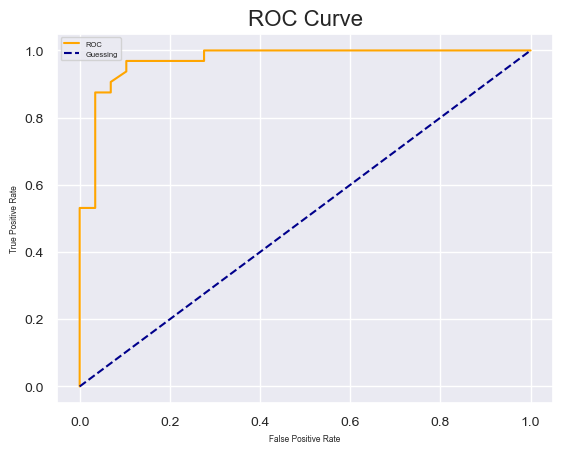

In [83]:
# lets create a function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    fig,ax=plt.subplots()
    # plot roc curve
    ax.plot(fpr,tpr,color="orange",label="ROC")
    #plot line with no predictive power (baseline)
    ax.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")

    # customize the plot
    ax.set(title="ROC Curve",xlabel="False Positive Rate",ylabel="True Positive Rate")
    #increase all the font size
    ax.tick_params(axis="both",which="major",labelsize=10)

    ax.legend(fontsize=16)
    ax.title.set_fontsize(16) # type: ignore


    ax.legend()


    plt.show()


plot_roc_curve(fpr,tpr)


In [84]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)


0.9714439655172414

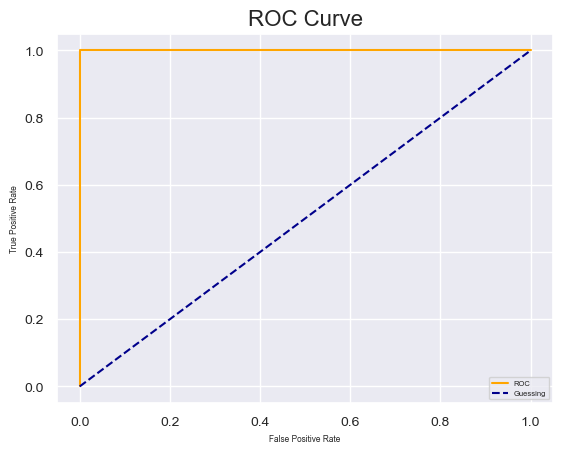

1.0

In [85]:
# plot perfect ROC curve and AUC score

fpr,tpr,thresholds=roc_curve(y_test,y_test)

plot_roc_curve(fpr,tpr)


## Confusion matrix

In [ ]:
# single Training and test split score
clf_single_score=clf.score(x_test,y_test)

#take mean of 5-fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,x,y,cv=5)) #cv -> no of split to test

# compare
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8183606557377049)

## Regression model evaluation metrics

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

np.random.seed(42)

# get the data ready
x=house_df.drop("target",axis=1)
y=house_df["target"]

# split into train/test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# fit the model

model=RandomForestRegressor()

model.fit(x_train,y_train)

# predict

y_preds=model.predict(x_test)

# evaluate the model

print(f"mean absolute error:{mean_absolute_error(y_test,y_preds)*100:.2f}")
print(f"mean squared error:{mean_squared_error(y_test,y_preds)*100:.2f}")
print(f"r2 score:{r2_score(y_test,y_preds)*100:.2f}")


mean absolute error:32.66
mean squared error:25.34
r2 score:80.66


1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

MAE- the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your model predictions are.

MSE- the squred average of the difference between the predictions and actual values. Squaring the errors removes negative errors. It gives you a rough idea of how far your predictions are from the actual values.



## 5. Imporving a model

first predictions = baseline predictions
first model = baseline model


From a data Perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters

`Parameters` = model find these patterns in data

`Hyperparameters` = settings on a model you can adjust to (potentially) improve its ability to find patterns


Three ways to adjust hyperparameters:

1. By hand

2. Randomly with RandomSearchCV

3. Exhaustively with GridSearchCV


## 5.1 Tuning hyperparameters by hand


In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`


In [ ]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels
    """

    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "recall":round(recall,2),
                 "f1":round(f1,2)}

    print(f"Acc:{accuracy*100:.2f} %")
    print(f"Precision:{precision* 100:.2f} %")
    print(f"Recall:{recall* 100:.2f} %")
    print(f"F1:{f1*100:.2f} %")

    return metric_dict

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data

heart_disease_shuffled=heart_disease.sample(frac=1)

# split into x/y

x=heart_disease_shuffled.drop("target",axis=1)

y=heart_disease_shuffled["target"]


# split into train/test/validation

train_split=round(0.7*len(heart_disease_shuffled)) # 70% of data for training
valid_split=round(train_split+0.15*len(heart_disease_shuffled)) # 15% of data for validation
# 70% + 15% = 85% of data for training and validation
x_train,y_train=x[:train_split],y[:train_split] # from 0 to train_split
 
x_valid,y_valid=x[train_split:valid_split],y[train_split:valid_split] # from train_split to valid_split

x_test,y_test=x[valid_split:],y[valid_split:] # from valid_split to end

len(x_train),len(x_valid),len(x_test)

clf=RandomForestClassifier()

clf.fit(x_train,y_train)

# make baseline predictions
y_preds=clf.predict(x_valid)

# evaluate the classifier on validation set

baseline_metrics=evaluate_preds(y_valid,y_preds)

baseline_metrics



Acc:82.22 %
Precision:81.48 %
Recall:88.00 %
F1:84.62 %


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

## 5.2 Hyperparameter tuning with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split

grid={"n_estimators":[10,100,200,500,1000,1200],
        "max_depth":[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}
np.random.seed(42)

np.random.seed(42)

# shuffle the data

heart_disease_shuffled = heart_disease.sample(frac=1)

# split into x/y

x = heart_disease_shuffled.drop("target", axis=1)

y = heart_disease_shuffled["target"]

# split into train/test/

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)
clf = RandomForestClassifier(n_jobs=1)

# setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf,
                                param_distributions=grid, # what we created above
                                n_iter=5, # number of models to try
                                cv=5, # cross validation
                                verbose=2 # print out results
                                )

# fit the RandomizedSearchCV version of clf

rs_clf.fit(x_train, y_train) # it will make validation set automatically

# find the best parameters

rs_clf.best_params_






Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total t

{'accuracy': 0.85, 'precision': 0.88, 'recall': 0.85, 'f1': 0.86}

In [ ]:

# evaluate the randomized search RandomForestClassifier model

rs_y_preds = rs_clf.predict(x_test)

# evaluate the predictions

rs_metrics = evaluate_preds(y_test, rs_y_preds)

rs_metrics


Acc:85.25 %
Precision:87.50 %
Recall:84.85 %
F1:86.15 %


{'accuracy': 0.85, 'precision': 0.88, 'recall': 0.85, 'f1': 0.86}

ValueError: Must pass 2-d input. shape=()

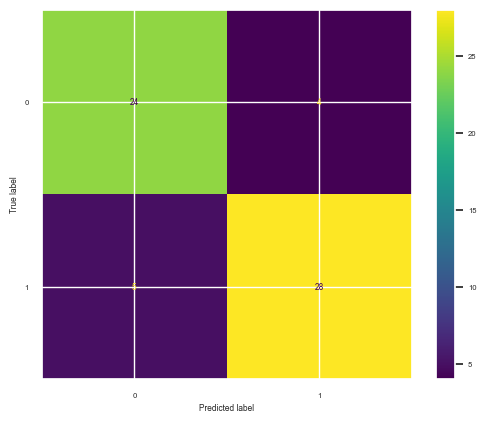

In [ ]:
# Make our confussion matrix more visual using seborn's heatmap()
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

#set the font scale
sns.set(font_scale=0.5)

#create a confussion matrix
conf_mat = ConfusionMatrixDisplay.from_estimator(rs_clf,x_test,y_test)

#plot using seborn
sns.heatmap(conf_mat)
